In [1]:
import sys
sys.path.append('../src')
from prediktiv_analyse import forbered_data_for_by, tren_regresjonsmodell, evaluer_modell
import pandas as pd

In [2]:
# Her kan man endre bynavnet for å kjøre analysen for en annen by
df = pd.read_csv("../data/BehandletVaerData.csv")

X, y, data_oslo = forbered_data_for_by(df, "Oslo")
modell = tren_regresjonsmodell(X, y)
y_pred, mse, r2 = evaluer_modell(modell, X, y)


Mean Squared Error: 55.07
R²-score: 0.02


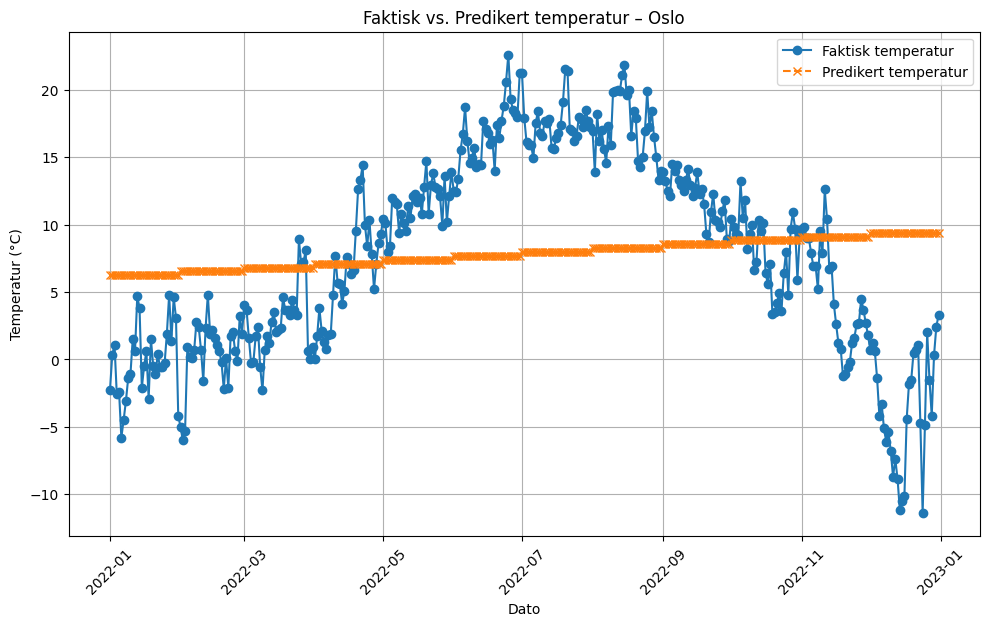

In [3]:
from prediktiv_analyse import plott_prediksjon

plott_prediksjon(data_oslo, X, y, y_pred, by_navn="Oslo")
